In [28]:
# We are to detect anomalies in the dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [29]:
file_path = r"C:/Users/DELL/OneDrive/Desktop/DESKTOP STUFF/Aptech/Python/Data Science/Arrhythmia Anomaly Detection/arrhythmia.data"

if not os.path.exists(file_path):
	raise FileNotFoundError(f"File not found: {file_path}")

df = pd.read_csv(file_path, header=None, sep=',')

# Display first few rows of dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df.shape)

   0    1    2    3    4    5    6    7    8    9    ...  270   271  272  273  \
0   75    0  190   80   91  193  371  174  121  -16  ...  0.0   9.0 -0.9  0.0   
1   56    1  165   64   81  174  401  149   39   25  ...  0.0   8.5  0.0  0.0   
2   54    0  172   95  138  163  386  185  102   96  ...  0.0   9.5 -2.4  0.0   
3   55    0  175   94  100  202  380  179  143   28  ...  0.0  12.2 -2.2  0.0   
4   75    0  190   80   88  181  360  177  103  -16  ...  0.0  13.1 -3.6  0.0   

   274  275  276   277   278  279  
0  0.0  0.9  2.9  23.3  49.4    8  
1  0.0  0.2  2.1  20.4  38.8    6  
2  0.0  0.3  3.4  12.3  49.0   10  
3  0.0  0.4  2.6  34.6  61.6    1  
4  0.0 -0.1  3.9  25.4  62.8    7  

[5 rows x 280 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB
None
              0           1           2           3           4           5    \
count  452.00000

In [30]:
# Anomaly Detection
# In this dataset, class '1' indicates normal instances, while classes '2' to '16' indicate various types of arrhythmia (anomalies).
# We will treat class '1' as normal and all other classes as anomalies.
df['target'] = df[279].apply(lambda x: 0 if x == 1 else 1)  # 0 for normal, 1 for anomaly
df.drop(columns=[279], inplace=True)
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))


target
0    245
1    207
Name: count, dtype: int64
target
0    0.542035
1    0.457965
Name: proportion, dtype: float64


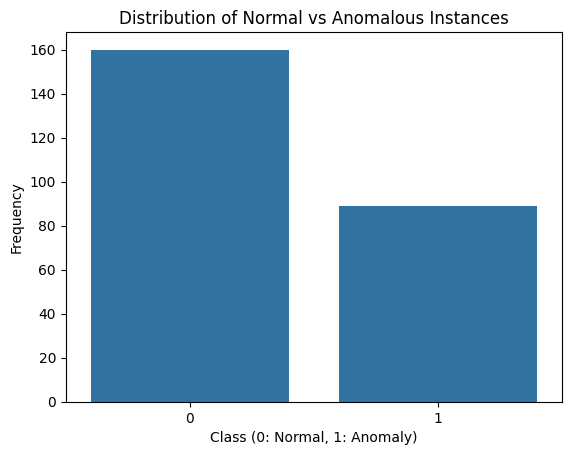

In [31]:
# Visualizations


# Histogram of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Normal vs Anomalous Instances')
plt.xlabel('Class (0: Normal, 1: Anomaly)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x1000 with 0 Axes>

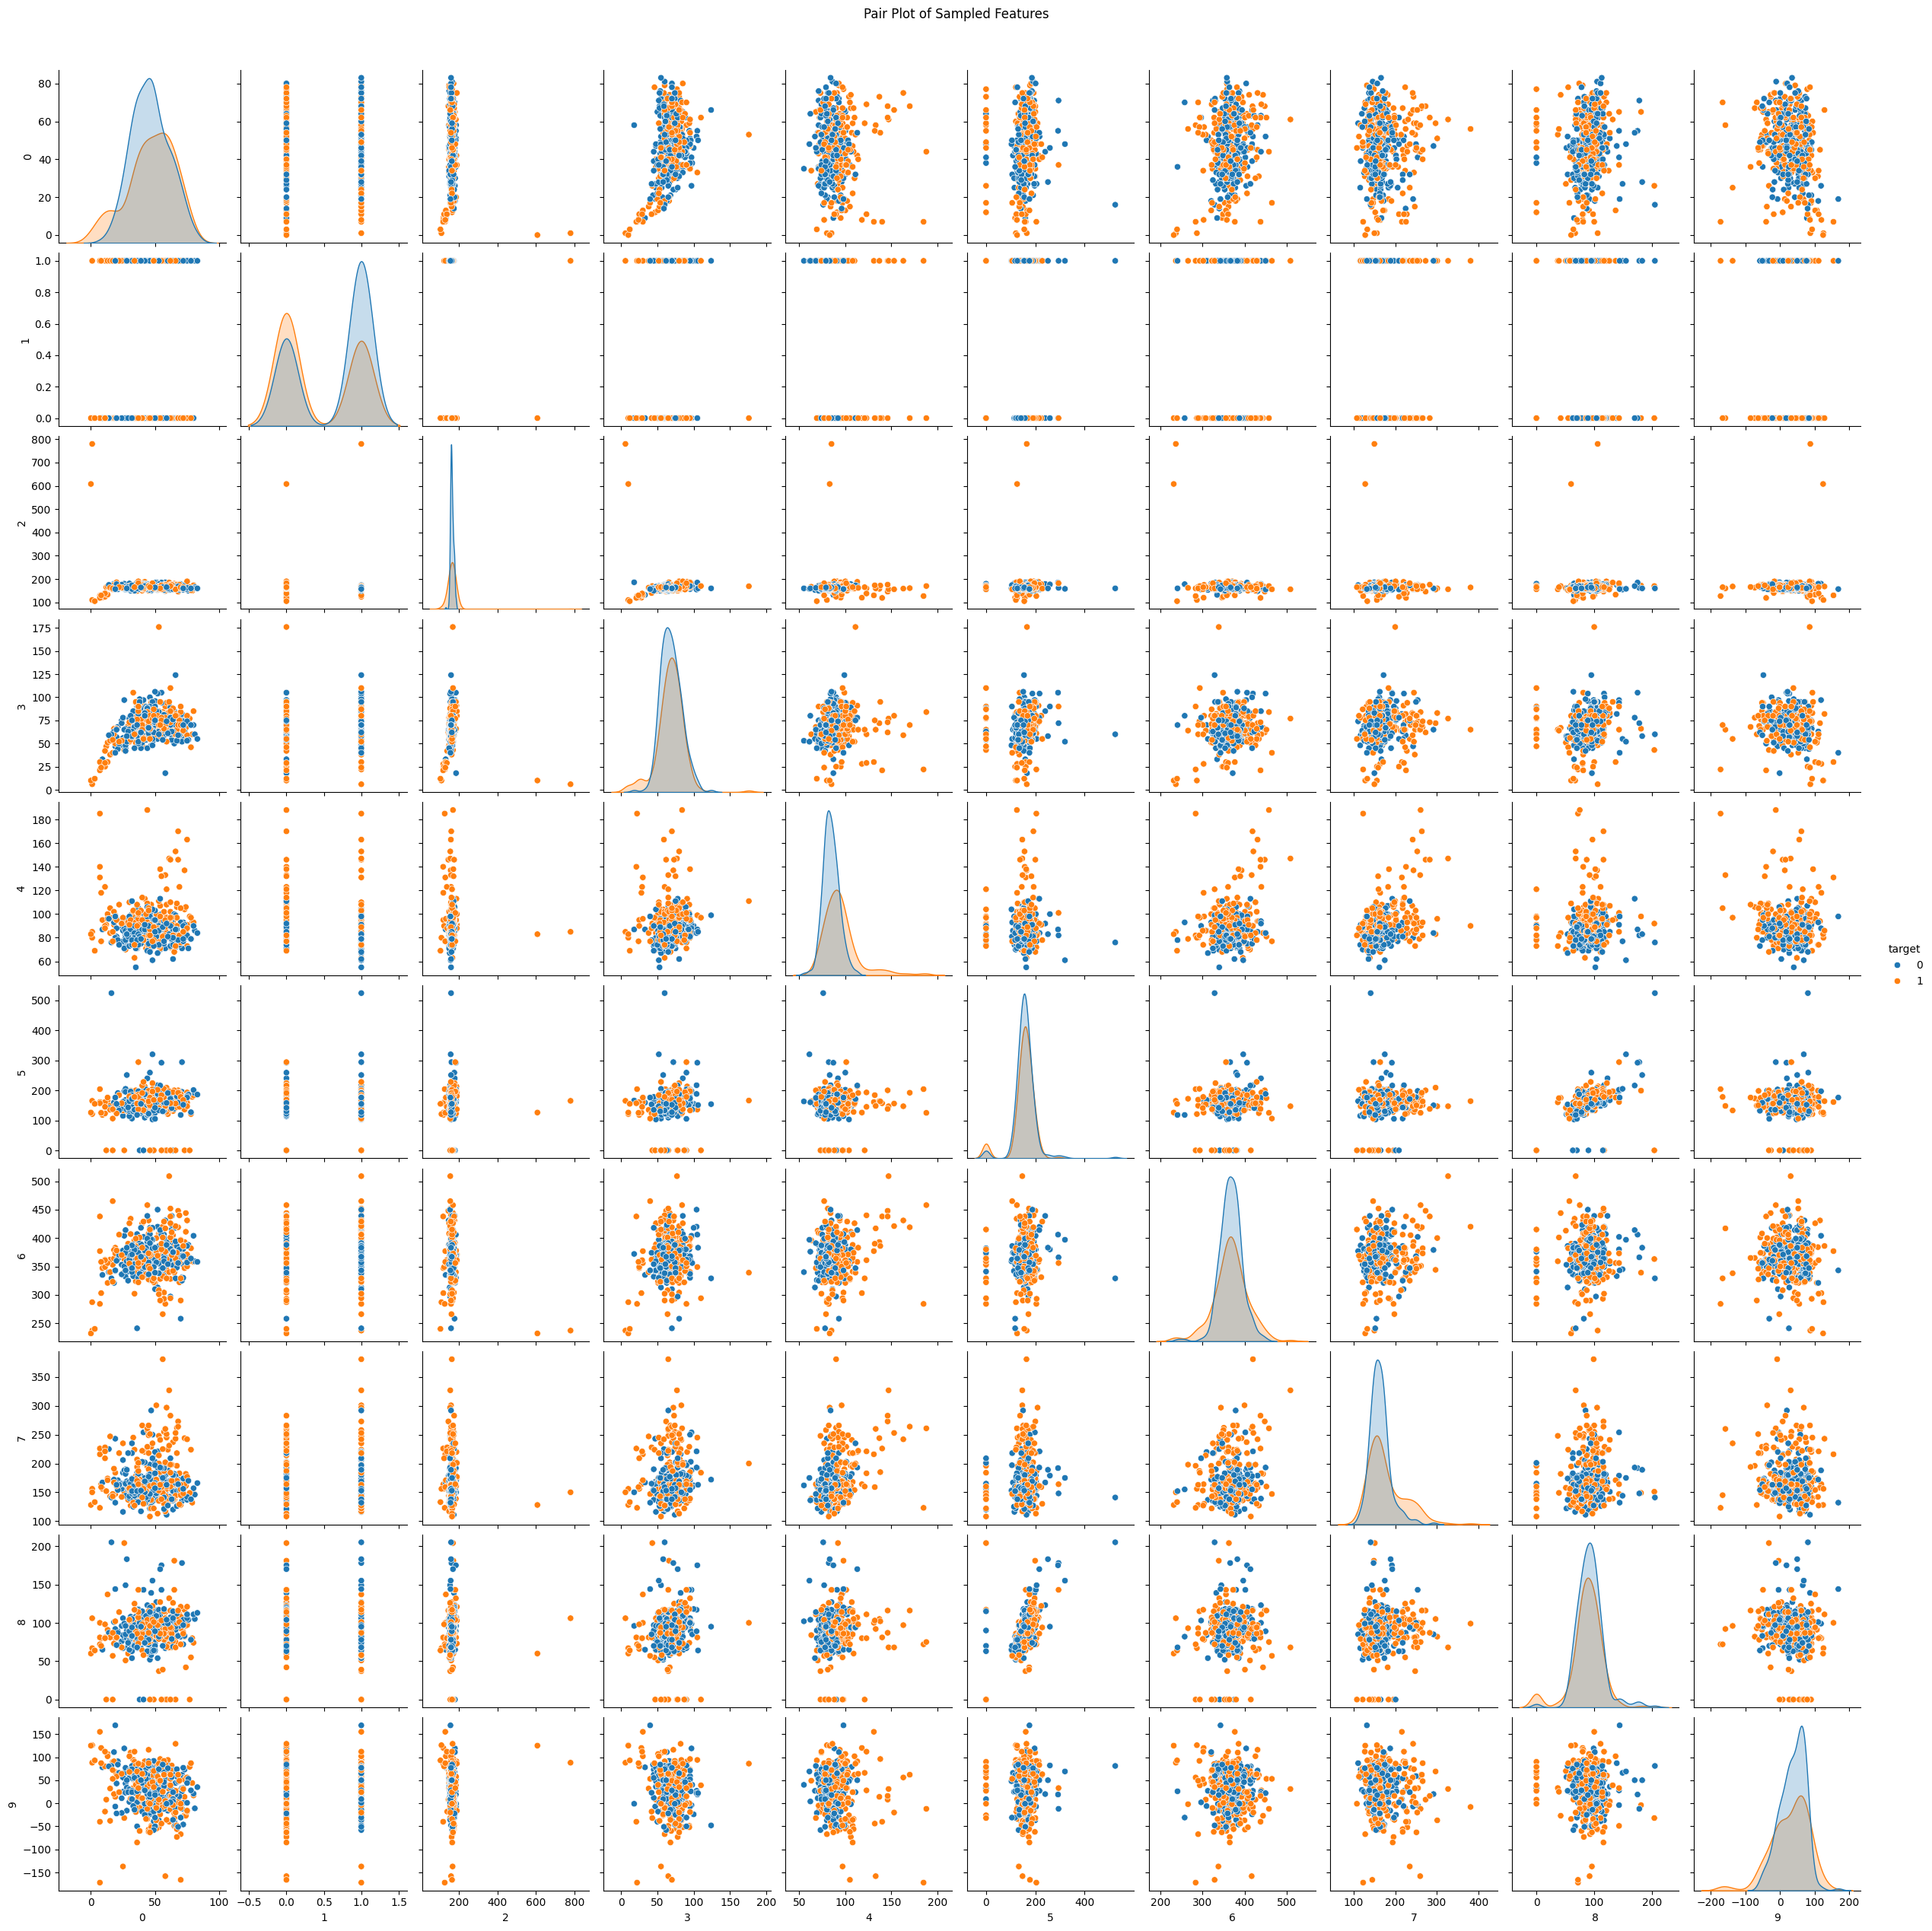

In [32]:
# Pair Plot (Due to high dimensionality, we will sample a subset of features for visualization)
n_samples = min(1000, len(df))
sampled_features = df.sample(n=n_samples, random_state=42)  # Sample up to 1000 instances for visualization
plt.figure(figsize=(12,10))
sns.pairplot(sampled_features, hue='target', diag_kind='kde', vars=[sampled_features.columns[i] for i in range(10)])  # Using first 10 features for pairplot
plt.suptitle('Pair Plot of Sampled Features', y=1.02)
plt.show()
# plt.ylabel('Density')
# plt.show()


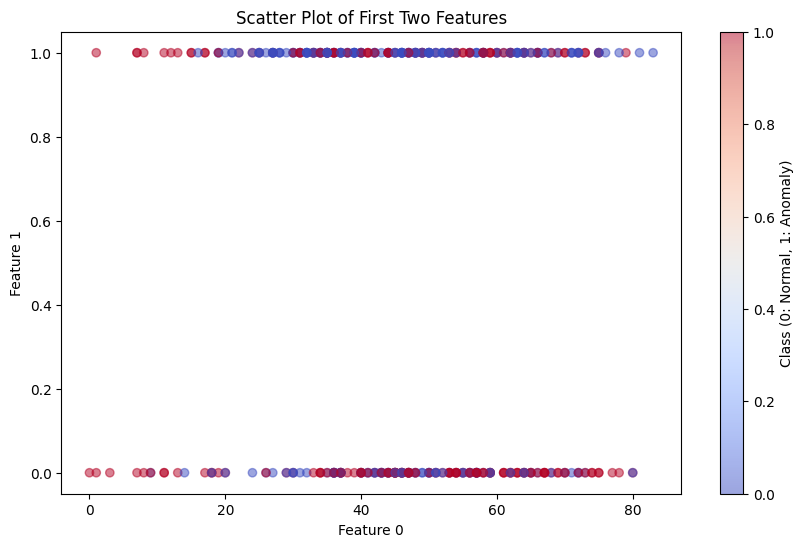

In [33]:
# Scatter Plot Diagram (Using first two features for simplicity)
plt.figure(figsize=(10,6))
plt.scatter(df[0], df[1], alpha=0.5, c=df['target'], cmap='coolwarm')
plt.title('Scatter Plot of First Two Features')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.colorbar(label='Class (0: Normal, 1: Anomaly)')
plt.show()

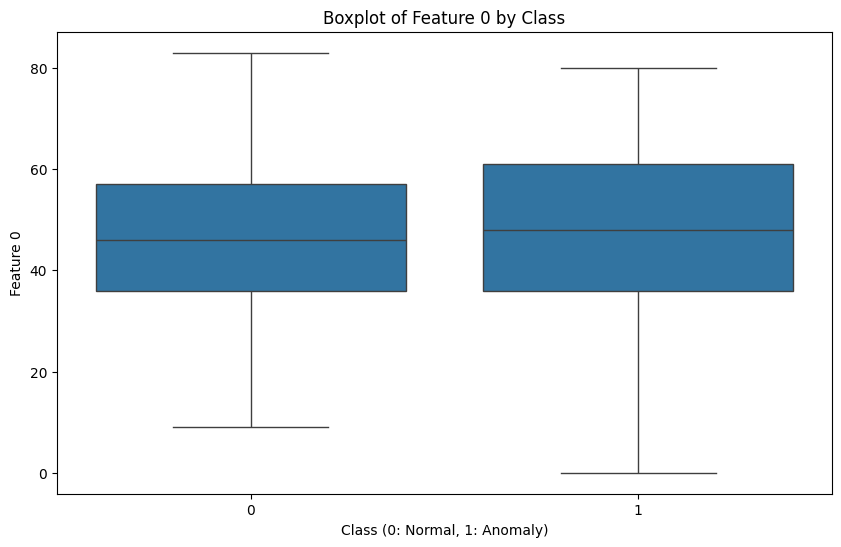

In [34]:
# Box Plot (First feature by class)
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y=0, data=df)
plt.title('Boxplot of Feature 0 by Class')
plt.xlabel('Class (0: Normal, 1: Anomaly)')
plt.ylabel('Feature 0')
plt.show()


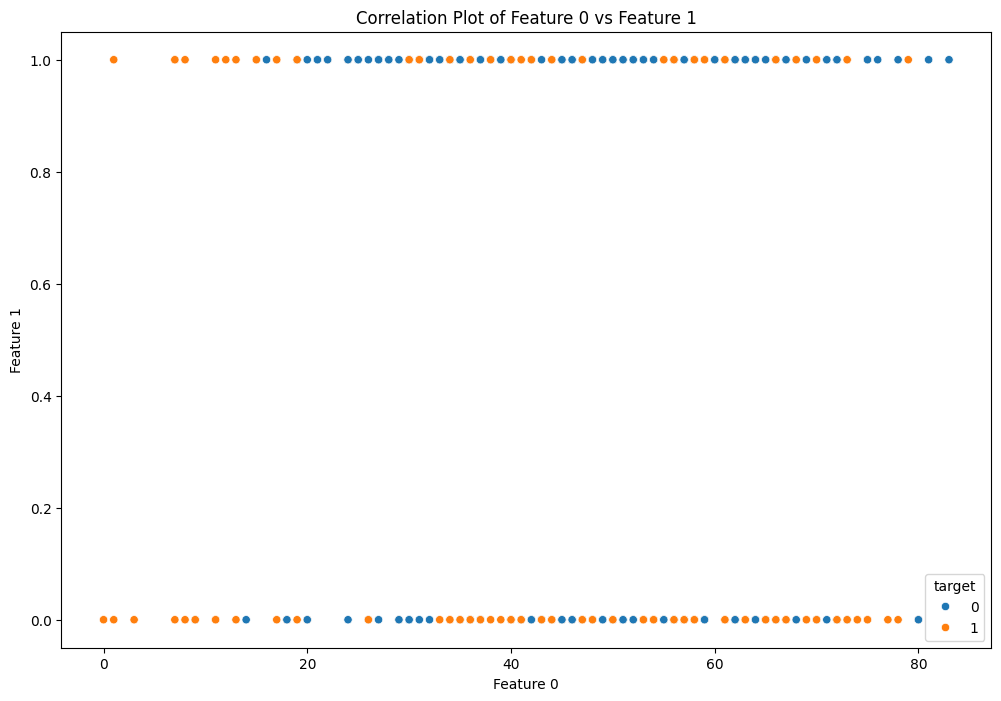

In [35]:
# Correlation Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x=0, y=1, hue='target', data=df)
plt.title('Correlation Plot of Feature 0 vs Feature 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [43]:
# Prepare data for modeling
# Remove non-numeric columns and handle missing values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.fillna(df_numeric.mean())

X = df_numeric.drop('target', axis=1)
y = df_numeric['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Baseline Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [44]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("RÂ² Score:", r2_score(y_test, y_pred))

Confusion Matrix:
[[43  6]
 [ 9 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        49
           1       0.85      0.79      0.81        42

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

ROC-AUC Score: 0.9064625850340136
Mean Absolute Error: 0.16483516483516483
Mean Squared Error: 0.16483516483516483
Root Mean Squared Error: 0.40599897147057507
RÂ² Score: 0.33673469387755106


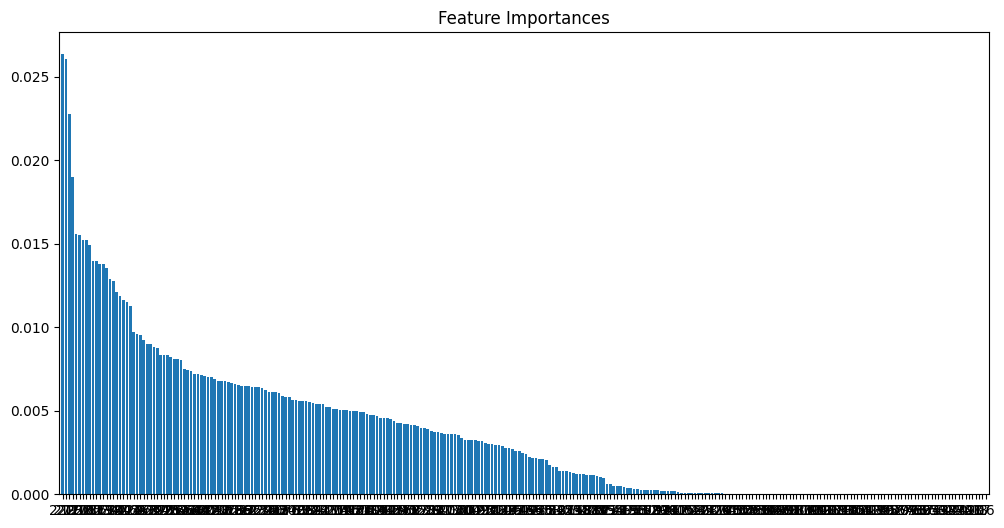

In [46]:
# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [str(i) for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Note: Due to the high dimensionality of the dataset, visualizations and interpretations may be limited.